In [1]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
df = pd.read_csv('/content/train.csv')
display(df.head(100))
display(df.info())


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

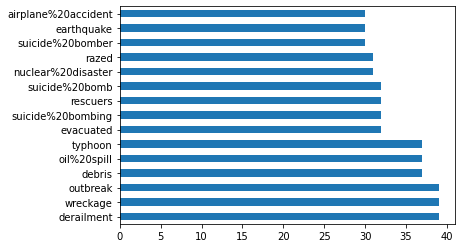

In [3]:
import seaborn as sns

df_dis = df[df['target']==1]
df_dis['keyword'].value_counts()[:15].plot(kind='barh')


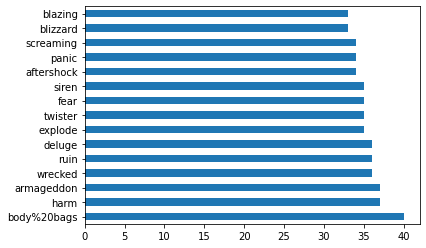

In [4]:
df_non_dis = df[df['target']==0]
df_non_dis['keyword'].value_counts()[:15].plot(kind='barh')

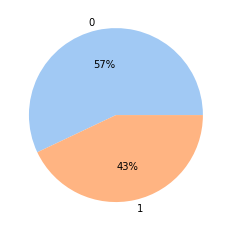

In [5]:
import seaborn as sns

#define data
data = [4342, 3271]
labels = ['0', '1']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [6]:
df = df.drop(['id', 'keyword','location'], axis = 1)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df["CleanText"] = df["text"].apply(lambda x: x.lower())
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [8]:

df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "",x))


In [9]:
def removeHTML(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeHTML(x))


In [10]:
def removeEmojis(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeEmojis(x))


In [11]:
def RemovePunctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [12]:
df["CleanText"] = df["CleanText"].apply(lambda x: RemovePunctuation(x))


In [13]:
def RemoveASCII(text):
  return re.sub(r'[^\x00-\x7f]', "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: RemoveASCII(x))


In [14]:
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [15]:
df['TokenizedText'] = df['CleanText'].apply(nltk.word_tokenize)

In [16]:
display(df.head())

,text,target,CleanText,TokenizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


In [17]:
stop = set(stopwords.words('english'))
df['RemoveStopWords'] = df['TokenizedText'].apply(lambda x: [word for word in x if word not in stop])
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [18]:
def doPorterStemmer(text):
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

df['PorterStemmer'] = df['RemoveStopWords'].apply(lambda x: doPorterStemmer(x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [19]:
def doLemmatizeWord(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

df['LemmatizedText'] = df['RemoveStopWords'].apply(lambda x: doLemmatizeWord(x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [20]:
df['FINAL']=df['LemmatizedText'].apply(lambda x: ''.join(i+' ' for i in x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText,FINAL
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [21]:
df.to_csv("normalized_dataset.csv")

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
cv_df = vectorizer.fit_transform(df['FINAL'])

vectorizer.get_feature_names_out()
print(cv_df.shape)

(7613, 16270)


In [40]:
cv_df[0]

<1x16270 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(ngram_range = (1,2))
tfidf_df = tfvectorizer.fit_transform(df['FINAL'])
print(tfidf_df.shape)

(7613, 63245)


In [24]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
import multiprocessing

In [25]:
sentences = df['FINAL'].values
sentences = [nltk.word_tokenize(title) for title in sentences]
#print(sentences)

In [26]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


In [27]:
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [28]:
w2v_model.wv.similarity("fire", 'wildfire')


0.97816944

In [29]:
w2v_model.wv.most_similar(positive=["disaster"])


[('declares', 0.998198390007019),
 ('sign', 0.9976317882537842),
 ('declaration', 0.9947868585586548),
 ('marians', 0.9946966171264648),
 ('obama', 0.9945654273033142),
 ('saipan', 0.9933526515960693),
 ('typhoondevastated', 0.9891212582588196),
 ('northern', 0.9868391752243042),
 ('abcnews', 0.8918386101722717),
 ('losdelsonido', 0.8917700052261353)]

In [30]:
w2v_model.wv.most_similar(positive=["evacuation"])

[('faan', 0.9996460676193237),
 ('order', 0.9995871782302856),
 ('town', 0.999384880065918),
 ('ultimatum', 0.9993318319320679),
 ('noted', 0.9993078708648682),
 ('almost', 0.999282956123352),
 ('floated', 0.9992767572402954),
 ('lifted', 0.9992693662643433),
 ('cabin', 0.9992678165435791),
 ('jet', 0.9992594718933105)]

In [31]:
w2v_model.wv.most_similar(positive=["injury"])

[('kid', 0.9998221397399902),
 ('previous', 0.999807596206665),
 ('meeting', 0.9998070597648621),
 ('remains', 0.9998070001602173),
 ('annihilated', 0.9998037815093994),
 ('changed', 0.9998033046722412),
 ('close', 0.9998029470443726),
 ('weird', 0.9998027086257935),
 ('store', 0.9998019933700562),
 ('outta', 0.9998018741607666)]

In [32]:
words = list(w2v_model.wv.vocab)
#words

In [33]:
w2v_df = []
for sent in sentences:
    vw = np.zeros(300) 
    #one sentence has many words
    for word in sent:
        vw += w2v_model[word]
    #average
    vw = vw/len(sent)
    w2v_df.append(np.array(vw))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [34]:
print(len(w2v_df))
#print(w2v_model['earthquake'])


7613


In [35]:
from sklearn.preprocessing import StandardScaler
'''ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.'''
from sklearn.decomposition import PCA
'''TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.'''
from sklearn.decomposition import TruncatedSVD
'''
trans_cv_df = StandardScaler(with_mean=False).fit_transform(cv_df)

#reduce dimention half
svd = TruncatedSVD(n_components=100)
svd_trans_cv_df = svd.fit_transform(trans_cv_df)

print(svd_trans_cv_df.shape)
'''

'\ntrans_cv_df = StandardScaler(with_mean=False).fit_transform(cv_df)\n\n#reduce dimention half\nsvd = TruncatedSVD(n_components=100)\nsvd_trans_cv_df = svd.fit_transform(trans_cv_df)\n\nprint(svd_trans_cv_df.shape)\n'

In [36]:
'''trans_tfidf_df = StandardScaler(with_mean=False).fit_transform(tfidf_df)
#reduce dimention half
svd = TruncatedSVD(n_components=100)
svd_trans_tfidf_df = svd.fit_transform(trans_tfidf_df)

print(svd_trans_tfidf_df.shape)'''

'trans_tfidf_df = StandardScaler(with_mean=False).fit_transform(tfidf_df)\n#reduce dimention half\nsvd = TruncatedSVD(n_components=100)\nsvd_trans_tfidf_df = svd.fit_transform(trans_tfidf_df)\n\nprint(svd_trans_tfidf_df.shape)'

(7613, 100)


,com1,com2
0,-2.141771,-1.050447
1,-2.093794,-1.110795
2,-0.161738,0.272308
3,-1.147551,4.437050
4,-1.660417,1.331676


,com1,com2,target
0,-2.141771,-1.050447,1
1,-2.093794,-1.110795,1
2,-0.161738,0.272308,1
3,-1.147551,4.437050,1
4,-1.660417,1.331676,1


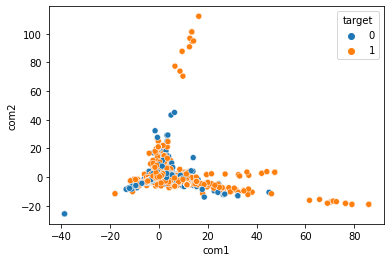

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

#reduce dimention half
pca = PCA(n_components=100)
pca_trans_w2v_df = pca.fit_transform(trans_w2v_df)

print(pca_trans_w2v_df.shape) 

df_pca_visual = pd.DataFrame({'com1': pca_trans_w2v_df[:,1], 'com2': pca_trans_w2v_df[:,2]})
display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
display(df_pca_visual.head())

sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")

In [38]:
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda_w2v_df = lda.fit_transform(trans_w2v_df, df['target'])
print(lda_w2v_df.shape) 


lda_w2v_df_visual = pd.DataFrame({'lda_com': lda_w2v_df[:,0]})
display(lda_w2v_df_visual.head())

lda_w2v_df_visual['target'] = df['target']
display(lda_w2v_df_visual.head())


import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'''

'\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\n\ntrans_w2v_df = StandardScaler().fit_transform(w2v_df)\n\n# apply Linear Discriminant Analysis\nlda = LinearDiscriminantAnalysis(n_components=1)\nlda_w2v_df = lda.fit_transform(trans_w2v_df, df[\'target\'])\nprint(lda_w2v_df.shape) \n\n\nlda_w2v_df_visual = pd.DataFrame({\'lda_com\': lda_w2v_df[:,0]})\ndisplay(lda_w2v_df_visual.head())\n\nlda_w2v_df_visual[\'target\'] = df[\'target\']\ndisplay(lda_w2v_df_visual.head())\n\n\nimport seaborn as sns\nsns.set_theme(style="whitegrid")\nax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'

(7613, 2)


,com1,com2
0,-1.036705,-2.141771
1,2.021366,-2.093794
2,-0.536721,-0.161738
3,-0.364266,-1.147551
4,-0.570433,-1.660417


,com1,com2,target
0,-1.036705,-2.141771,1
1,2.021366,-2.093794,1
2,-0.536721,-0.161738,1
3,-0.364266,-1.147551,1
4,-0.570433,-1.660417,1


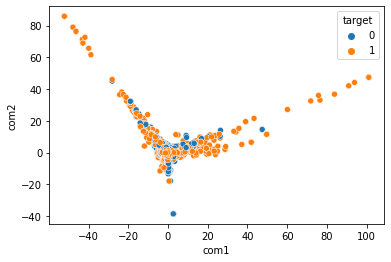

In [39]:
# This is for visualization code
from sklearn.decomposition import PCA

pca_visual = PCA(n_components=2)
df_visual = pca_visual.fit_transform(trans_w2v_df)
print(df_visual.shape) 

df_pca_visual = pd.DataFrame(df_visual, columns=['com1', 'com2'])
display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
display(df_pca_visual.head())

sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")

In [41]:
df['FINAL']=df['LemmatizedText'].apply(lambda x: ''.join(i+' ' for i in x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText,FINAL
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [42]:
! pip install keras

In [53]:
!pip install tensorflow

In [58]:
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.utils import pad_sequences
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,Embedding,Bidirectional,LSTM,GlobalMaxPool1D
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

'''
from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(1)
'''

'\nfrom numpy.random import seed\nseed(1)\n\nimport tensorflow as tf\ntf.random.set_seed(1)\n'

In [59]:
tweets = df['FINAL'].values

In [60]:
#This Tokenizer is by Keras
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(tweets)
vocab_length = len(word_tokenizer.word_index) + 1

#None values is embedding by 0
def embedding_by_using_keras(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [61]:
longest_tweet = max(tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_tweet))

#create values to make it the same input size.
padded_sentences = pad_sequences(embedding_by_using_keras(tweets), length_long_sentence, padding='post')

In [62]:

pad_X_train, pad_X_test, pad_y_train, pad_y_test = train_test_split(padded_sentences, df['target'], test_size=0.30, random_state=17)

In [63]:
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [65]:
# total numberof extracted words.
w2v_vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(w2v_vocab))

w2v_vocab=list(w2v_vocab.keys())

w2v_dictionary={}
for word in w2v_vocab:
  w2v_dictionary[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(w2v_dictionary)) # should come equal to vocab size


The total number of words are :  16302
The no of key-value pairs :  16302


In [66]:
# now creating the embedding matrix
embedding_matrix_by_word2vec =np.zeros(shape=(vocab_length, 100))

for word, index in word_tokenizer.word_index.items():
  embedding_vector = w2v_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix_by_word2vec[index]=embedding_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [67]:
def BLSTM_W2V():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix_by_word2vec.shape[0], 
                        output_dim=embedding_matrix_by_word2vec.shape[1], 
                        weights = [embedding_matrix_by_word2vec], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [68]:
model_LSTM_W2V = BLSTM_W2V()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM_W2V.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    #validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - 36s 169ms/step - loss: 0.7177 - accuracy: 0.5412 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - 28s 165ms/step - loss: 0.6562 - accuracy: 0.6232 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - 29s 171ms/step - loss: 0.5518 - accuracy: 0.7424 - lr: 0.0010
Epoch 4/7
167/167 [==============================] - 28s 170ms/step - loss: 0.4615 - accuracy: 0.8092 - lr: 0.0010
Epoch 5/7
167/167 [==============================] - 27s 163ms/step - loss: 0.3835 - accuracy: 0.8533 - lr: 0.0010
Epoch 6/7
167/167 [==============================] - 27s 164ms/step - loss: 0.3327 - accuracy: 0.8816 - lr: 0.0010
Epoch 7/7
167/167 [==============================] - 28s 170ms/step - loss: 0.2901 - accuracy: 0.9056 - lr: 0.0010


In [74]:
lstm_w2v_pred_y = (model_LSTM_W2V.predict(pad_X_test) > 0.5).astype("int32")
lstm_w2v_pred_y_prob = model_LSTM_W2V.predict(pad_X_test)


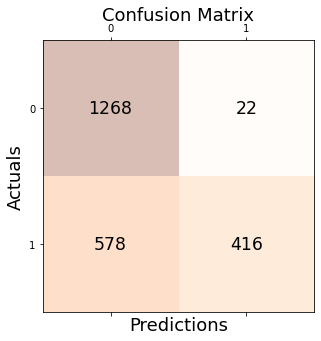

In [75]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pad_y_test, y_pred=lstm_w2v_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()